We are cropping the images because otherwise first of all, they were taking a lot of time and they were always biased towards non-segmenting anything.

Keras image data generator only works with jpg, png and tif files. Therefore we need to define custom data generator for npy files.

We will combine 3 channels into one volume and ignore T1 because T1ce is a better contrast enhanced version of T1 so why to take t1 then ?

In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
import tifffile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


## Understanding the dataset

In [ ]:
TRAIN_DATASET_PATH = '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [ ]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()

In [ ]:
print(test_image_flair.max())

1854.603271484375


In [ ]:
test_image_flair.shape

(240, 240, 155)

In [ ]:


test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [ ]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()

In [ ]:

test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

In [ ]:
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()

In [ ]:


test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

In [ ]:
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()

In [ ]:
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [ ]:
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [ ]:
print(np.unique(test_mask))

[0 1 2 4]


In [ ]:

test_mask[test_mask==4] = 3

In [ ]:
print(np.unique(test_mask))

[0 1 2 3]


In [ ]:
import random
n_slice=random.randint(0, test_mask.shape[2])

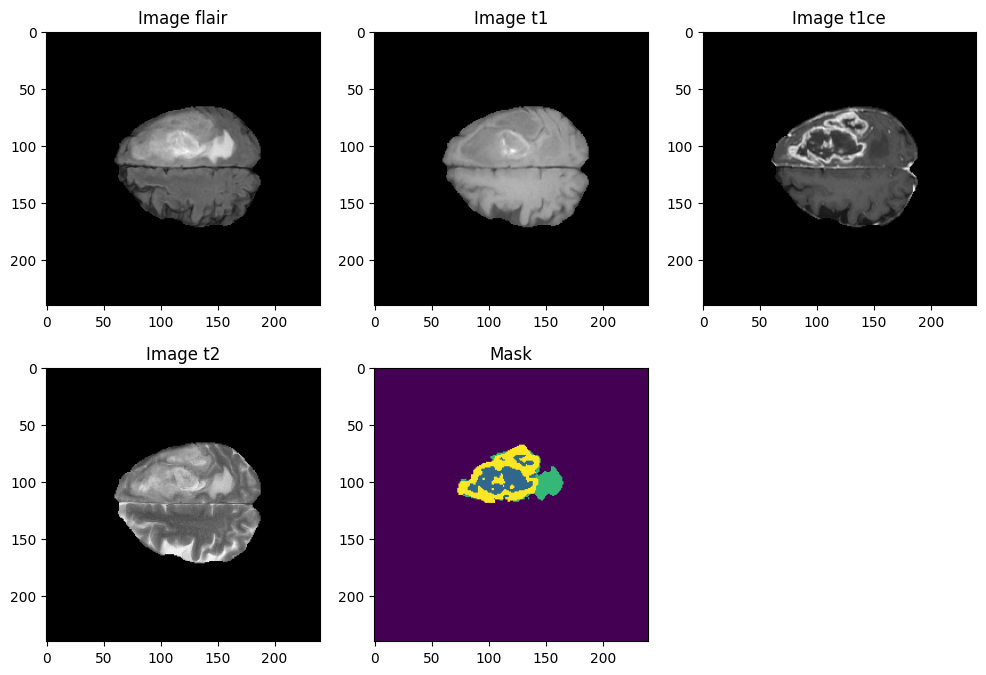

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [ ]:
combined_x=combined_x[56:184, 56:184, 13:141] #Cropping to 128x128x128x4

In [ ]:
test_mask = test_mask[56:184, 56:184, 13:141]

In [ ]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

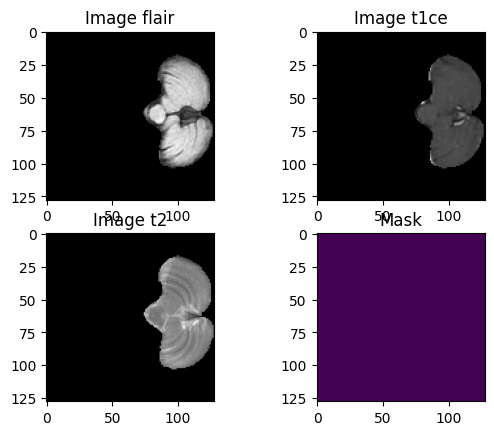

In [ ]:
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
tifffile.imwrite('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/combined255.npy', combined_x)

In [ ]:
my_img=np.load('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/combined255.npy')

In [ ]:
test_mask = to_categorical(test_mask, num_classes=4)

In [ ]:
my_img.shape

(128, 128, 128, 3)

In [ ]:

#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))


In [ ]:
for img in range(len(t2_list)):
    print("Now preparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))


    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)

    else:
        print("I am useless")

Now preparing image and masks number:  0


KeyboardInterrupt: 

Then we split the data between the training and test set

## Specifying the training and val dirs and lists

In [ ]:
import os


train_img_dir = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/hosp5/images/"
train_mask_dir = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/hosp5/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)
val_img_dir = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/input_data_128/val/images/"

val_mask_dir = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/input_data_128/val/masks/"
batch_size = 2
val_img_list = os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os
from tqdm import tqdm

In [ ]:
save_dir = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/hosp5_models"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os
from tqdm import tqdm
hospital_id = "hosp5"

# Simple 3D U-Net Implementation
class Simple3DUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=4):
        super(Simple3DUNet, self).__init__()

        # Encoder
        self.enc1 = self.conv_block(in_channels, 32)
        self.enc2 = self.conv_block(32, 64)
        self.enc3 = self.conv_block(64, 128)
        self.enc4 = self.conv_block(128, 256)

        self.pool = nn.MaxPool3d(2)

        # Bottleneck
        self.bottleneck = self.conv_block(256, 512)

        # Decoder
        self.upconv4 = self.upconv_block(512, 256)
        self.dec4 = self.conv_block(512, 256)
        self.upconv3 = self.upconv_block(256, 128)
        self.dec3 = self.conv_block(256, 128)
        self.upconv2 = self.upconv_block(128, 64)
        self.dec2 = self.conv_block(128, 64)
        self.upconv1 = self.upconv_block(64, 32)
        self.dec1 = self.conv_block(64, 32)

        # Final convolution
        self.final = nn.Conv3d(32, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def upconv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))

        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc4))

        # Decoder
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)

        return torch.softmax(self.final(dec1), dim=1)

# Dataset Class
class BratsDataset(Dataset):
    def __init__(self, img_dir, mask_dir, img_list):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.img_list = img_list

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        mask_path = os.path.join(self.mask_dir, self.img_list[idx].replace("image", "mask"))

        image = torch.from_numpy(np.load(img_path)).float().permute(3, 0, 1, 2)  # Channel first
        mask = torch.from_numpy(np.load(mask_path)).float().permute(3, 0, 1, 2)

        return image, mask

# Initialize model, dataset and dataloaders
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Simple3DUNet().to(device)

# Dataset and Dataloaders
train_dataset = BratsDataset(train_img_dir, train_mask_dir, sorted(train_img_list))
val_dataset = BratsDataset(val_img_dir, val_mask_dir, sorted(val_img_list))

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Or use Dice Loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training Loop
num_epochs = 3
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for images, masks in tqdm(train_loader):
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)

    # Calculate metrics
    train_loss = train_loss / len(train_dataset)
    val_loss = val_loss / len(val_dataset)

    # Add this inside your training loop after validation calculations
# Save best model based on validation loss
    if val_loss < best_val_loss:
      best_val_loss = val_loss

    # Save with full path
      torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': val_loss,
    }, os.path.join(save_dir, f'best_model_{hospital_id}.pth'))

100%|██████████| 25/25 [02:10<00:00,  5.22s/it]


In [ ]:
# Corrected Evaluation Metrics
def dice_coeff(pred, target, smooth=1e-6):
    # Input shapes: (batch_size, num_classes, D, H, W)
    intersection = (pred * target).sum(dim=(2, 3, 4))
    union = pred.sum(dim=(2, 3, 4)) + target.sum(dim=(2, 3, 4))

    dice = (2. * intersection + smooth) / (union + smooth)
    return dice.mean()

def jaccard(pred, target, smooth=1e-6):
    # Input shapes: (batch_size, num_classes, D, H, W)
    intersection = (pred * target).sum(dim=(2, 3, 4))
    total = (pred + target).sum(dim=(2, 3, 4))
    union = total - intersection

    jaccard = (intersection + smooth) / (union + smooth)
    return jaccard.mean()

def calculate_metrics(model, dataloader):
    model.eval()
    dice_scores = []
    iou_scores = []

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)  # Shape: (batch, 4, D, H, W)

            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)  # Shape: (batch, D, H, W)

            # Convert to one-hot encoding
            preds_onehot = F.one_hot(preds, num_classes=4).permute(0, 4, 1, 2, 3).float()
            # preds_onehot shape: (batch, 4, D, H, W)

            # Masks are already in (batch, 4, D, H, W) shape
            masks_onehot = masks

            # Calculate metrics per class (skip background class 0)
            for c in range(1, 4):
                dice = dice_coeff(preds_onehot[:, c:c+1], masks_onehot[:, c:c+1])
                iou = jaccard(preds_onehot[:, c:c+1], masks_onehot[:, c:c+1])

                dice_scores.append(dice.item())
                iou_scores.append(iou.item())

    return np.mean(dice_scores), np.mean(iou_scores)

In [ ]:
# Calculate validation metrics
val_dice, val_iou = calculate_metrics(model, val_loader)
print(f"Validation Dice: {val_dice:.4f} | Validation IoU: {val_iou:.4f}")

Validation Dice: 0.1325 | Validation IoU: 0.0869


In [ ]:
# Run this after saving files
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')  # Re-mount drive

Mounted at /content/drive


In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import jaccard_score

# 1. FedAvg Implementation
def federated_average(model_paths):
    """Aggregate models using FedAvg algorithm"""
    global_weights = {}
    num_models = len(model_paths)

    # Initialize with first model
    checkpoint = torch.load(model_paths[0])
    for key in checkpoint['model_state_dict']:
        global_weights[key] = checkpoint['model_state_dict'][key] / num_models

    # Sum weights from other models
    for path in model_paths[1:]:
        checkpoint = torch.load(path)
        state_dict = checkpoint['model_state_dict']
        for key in state_dict:
            global_weights[key] += state_dict[key] / num_models

    return global_weights

# 2. Load Global Model
class GlobalModel(Simple3DUNet):  # Inherit from your UNet class
    def __init__(self):
        super().__init__()

model_paths = [
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp1_models/best_model_hosp1.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp2_models/best_model_hosp2.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp3_models/best_model_hosp3.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp4_models/best_model_hosp4.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp5_models/best_model_hosp5.pth'

    # ... add all 5 hospital models
]

global_weights = federated_average(model_paths)
global_model = GlobalModel().to(device)
global_model.load_state_dict(global_weights)

# 3. Evaluation Metrics
def compute_metrics(true_mask, pred_mask):
    """Compute segmentation metrics for 3D volumes"""
    metrics = {}

    # Flatten 3D volumes
    true_flat = true_mask.cpu().numpy().flatten()
    pred_flat = pred_mask.cpu().numpy().flatten()

    # Dice Coefficient (F1 Score)
    intersection = np.sum(true_flat * pred_flat)
    metrics['dice'] = (2. * intersection) / (np.sum(true_flat) + np.sum(pred_flat))

    # Jaccard Similarity (IoU)
    metrics['iou'] = jaccard_score(true_flat, pred_flat, average='micro')

    # Sensitivity and Specificity
    tp = np.sum((true_flat == 1) & (pred_flat == 1))
    fn = np.sum((true_flat == 1) & (pred_flat == 0))
    fp = np.sum((true_flat == 0) & (pred_flat == 1))
    tn = np.sum((true_flat == 0) & (pred_flat == 0))

    metrics['sensitivity'] = tp / (tp + fn + 1e-9)
    metrics['specificity'] = tn / (tn + fp + 1e-9)

    return metrics

# 4. Evaluation Loop
def evaluate_global_model(test_loader):
    global_model.eval()
    total_metrics = {'dice':0, 'iou':0, 'sensitivity':0, 'specificity':0}

    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = global_model(images)
            preds = torch.argmax(outputs, dim=1)  # For multi-class segmentation

            # Update metrics
            metrics = compute_metrics(masks, preds)
            for key in metrics:
                total_metrics[key] += metrics[key] * images.size(0)

    # Average across all samples
    for key in total_metrics:
        total_metrics[key] /= len(test_loader.dataset)

    return total_metrics

# 5. Run Evaluation
# Assuming you have a test dataset loader
test_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)
metrics = evaluate_global_model(test_loader)

print(f"Global Model Performance:")
print(f"Dice Coefficient: {metrics['dice']:.4f}")
print(f"IoU/Jaccard: {metrics['iou']:.4f}")
print(f"Sensitivity: {metrics['sensitivity']:.4f}")
print(f"Specificity: {metrics['specificity']:.4f}")

ValueError: operands could not be broadcast together with shapes (16777216,) (4194304,) 

In [ ]:
# Add this before evaluation
test_sample = next(iter(test_loader))
images, masks = test_sample
outputs = global_model(images.to(device))

print("True mask shape:", masks.shape)  # Should be (B, D, H, W)
print("Model output shape:", outputs.shape)  # Should be (B, num_classes, D, H, W)

True mask shape: torch.Size([2, 4, 128, 128, 128])
Model output shape: torch.Size([2, 4, 128, 128, 128])


In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader

# 1. Federated Averaging Implementation
def federated_average(model_paths):
    """Aggregate model weights using FedAvg algorithm"""
    global_weights = {}
    num_models = len(model_paths)

    # Initialize with first model
    checkpoint = torch.load(model_paths[0])
    for key in checkpoint['model_state_dict']:
        global_weights[key] = checkpoint['model_state_dict'][key] / num_models

    # Aggregate weights from other models
    for path in model_paths[1:]:
        checkpoint = torch.load(path)
        state_dict = checkpoint['model_state_dict']
        for key in state_dict:
            global_weights[key] += state_dict[key] / num_models

    return global_weights

# 2. Load and Aggregate Models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths to your saved models (modify accordingly)
model_paths = [
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp1_models/best_model_hosp1.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp2_models/best_model_hosp2.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp3_models/best_model_hosp3.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp4_models/best_model_hosp4.pth',
    '/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp5_models/best_model_hosp5.pth'

]

# Create global model instance
global_model = Simple3DUNet().to(device)

# Perform FedAvg
global_weights = federated_average(model_paths)
global_model.load_state_dict(global_weights)

# 3. Evaluation with Corrected Metrics (as provided)
# Corrected Metrics Functions
def dice_coeff(pred, target, smooth=1e-6):
    """Input shapes: (batch_size, num_classes, D, H, W)"""
    intersection = (pred * target).sum(dim=(2, 3, 4))  # Sum over spatial dimensions
    union = pred.sum(dim=(2, 3, 4)) + target.sum(dim=(2, 3, 4))
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice.mean()  # Mean over batch and classes

def jaccard(pred, target, smooth=1e-6):
    """Input shapes: (batch_size, num_classes, D, H, W)"""
    intersection = (pred * target).sum(dim=(2, 3, 4))  # Sum over spatial dimensions
    total = (pred + target).sum(dim=(2, 3, 4))
    union = total - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.mean()  # Mean over batch and classes

# Revised Evaluation Function
def calculate_metrics(model, dataloader):
    model.eval()
    dice_scores = []
    iou_scores = []

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)  # (B, 4, D, H, W)
            masks = masks.to(device)    # (B, 4, D, H, W)

            outputs = model(images)     # (B, 4, D, H, W)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)  # (B, D, H, W)

            # Convert to one-hot encoding
            preds_onehot = F.one_hot(preds, num_classes=4)  # (B, D, H, W, 4)
            preds_onehot = preds_onehot.permute(0, 4, 1, 2, 3).float()  # (B, 4, D, H, W)

            # Calculate metrics per tumor class (skip background class 0)
            for c in range(1, 4):
                # Isolate current class
                class_pred = preds_onehot[:, c:c+1]  # (B, 1, D, H, W)
                class_mask = masks[:, c:c+1]         # (B, 1, D, H, W)

                # Calculate metrics
                dice = dice_coeff(class_pred, class_mask)
                iou_val = jaccard(class_pred, class_mask)

                dice_scores.append(dice.item())
                iou_scores.append(iou_val.item())

    return np.mean(dice_scores), np.mean(iou_scores)

# 4. Run Evaluation
# Assuming you have a test dataloader with one-hot encoded masks
test_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

dice_score, iou_score = calculate_metrics(global_model, test_loader)

print(f"\nGlobal Model Performance:")
print(f"Mean Dice Coefficient (Tumor Regions): {dice_score:.4f}")
print(f"Mean IoU/Jaccard (Tumor Regions): {iou_score:.4f}")


Global Model Performance:
Mean Dice Coefficient (Tumor Regions): 0.0635
Mean IoU/Jaccard (Tumor Regions): 0.0635


In [ ]:
# Test with sample data first
test_sample = next(iter(test_loader))
dice, iou = calculate_metrics(global_model, [test_sample])
print(f"Sample Dice: {dice:.4f}, IoU: {iou:.4f}")

# Full evaluation
dice_score, iou_score = calculate_metrics(global_model, test_loader)
print(f"\nFinal Metrics:")
print(f"Mean Dice: {dice_score:.4f}")
print(f"Mean IoU: {iou_score:.4f}")

Sample Dice: 0.0000, IoU: 0.0000

Final Metrics:
Mean Dice: 0.0635
Mean IoU: 0.0635


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from tqdm import tqdm

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Custom Dataset Class
class BRATSDataset(Dataset):
    def __init__(self, images_dir, masks_dir):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = np.load(img_path)
        mask = np.load(mask_path)

        # Convert to channels-first format for PyTorch
        image = np.transpose(image, (3, 0, 1, 2))  # (C, H, W, D)
        mask = np.argmax(mask, axis=-1)  # Convert one-hot to class indices

        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.long)

        return image, mask

# Modified U-Net without final softmax
class Simple3DUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=4):
        super(Simple3DUNet, self).__init__()
               # Encoder
        self.enc1 = self.conv_block(in_channels, 32)
        self.enc2 = self.conv_block(32, 64)
        self.enc3 = self.conv_block(64, 128)
        self.enc4 = self.conv_block(128, 256)

        self.pool = nn.MaxPool3d(2)

        # Bottleneck
        self.bottleneck = self.conv_block(256, 512)

        # Decoder
        self.upconv4 = self.upconv_block(512, 256)
        self.dec4 = self.conv_block(512, 256)
        self.upconv3 = self.upconv_block(256, 128)
        self.dec3 = self.conv_block(256, 128)
        self.upconv2 = self.upconv_block(128, 64)
        self.dec2 = self.conv_block(128, 64)
        self.upconv1 = self.upconv_block(64, 32)
        self.dec1 = self.conv_block(64, 32)

        # Final convolution
        self.final = nn.Conv3d(32, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def upconv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))

        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc4))

        # Decoder
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)

        return self.final(dec1)  # Remove softmax from final layer

def train_hospital_model(hospital_id, global_weights_path, output_path):
    # Load global model weights
    global_model = Simple3DUNet()
    global_model.load_state_dict(torch.load(global_weights_path))
    global_model.to(device)

    # Hospital-specific data paths
    base_path = f'/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/hosp{hospital_id}'
    images_dir = os.path.join(base_path, 'images')
    masks_dir = os.path.join(base_path, 'masks')

    # Create dataset and dataloader
    dataset = BRATSDataset(images_dir, masks_dir)
    train_loader = DataLoader(dataset, batch_size=2, shuffle=True)

    # Initialize local model with global weights
    local_model = Simple3DUNet()
    local_model.load_state_dict(global_model.state_dict())
    local_model.to(device)

    # Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(local_model.parameters(), lr=1e-4)

    # Training loop
    local_model.train()
    for epoch in range(3):  # 3 local epochs
        running_loss = 0.0
        for images, masks in tqdm(train_loader):
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = local_model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Hospital {hospital_id} - Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')

    # Save trained local model weights
    torch.save(local_model.state_dict(), os.path.join(output_path, f'hosp{hospital_id}_weights.pth'))
    print(f"Saved hospital {hospital_id} weights")

if __name__ == "__main__":
    # Configure these parameters for each hospital
    HOSPITAL_ID = 1  # Change this for each hospital
    GLOBAL_WEIGHTS_PATH = "/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/global_weights.pth"  # Initial global weights
    OUTPUT_PATH = f'/content/drive/MyDrive/BraTS2020_Extracted/BraTS2020_TrainingData/Federated Learning/Simple U-Net/hosp{hospital_id}_models'

    train_hospital_model(HOSPITAL_ID, GLOBAL_WEIGHTS_PATH, OUTPUT_PATH)

EOFError: 